In [1]:
!pip install make-spirals

## Nearest Centroid Classifier

El clasificador `NearestCentroid` es un algoritmo sencillo que representa cada clase por el centroide de sus miembros. Su funcionamiento se rige por el siguiente algoritmo:

1. Determinar el centroide de cada clase como el valor promedio de todas las muestras asignadas a dicha clase para cada característica
2. Asignar las muestras a la clase representada por el centroide más cercano

Como se observar, no hay que elegir ningún parámetro, por lo que es un buen clasificador de referencia. 

Veamos cómo funciona con un ejemplo:

<ipython-input-2-e5bf46c3af51>:46: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1,i].pcolormesh(xx, yy, Z, cmap=plt.cm.Accent)
<ipython-input-2-e5bf46c3af51>:46: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1,i].pcolormesh(xx, yy, Z, cmap=plt.cm.Accent)
<ipython-input-2-e5bf46c3af51>:46: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals 

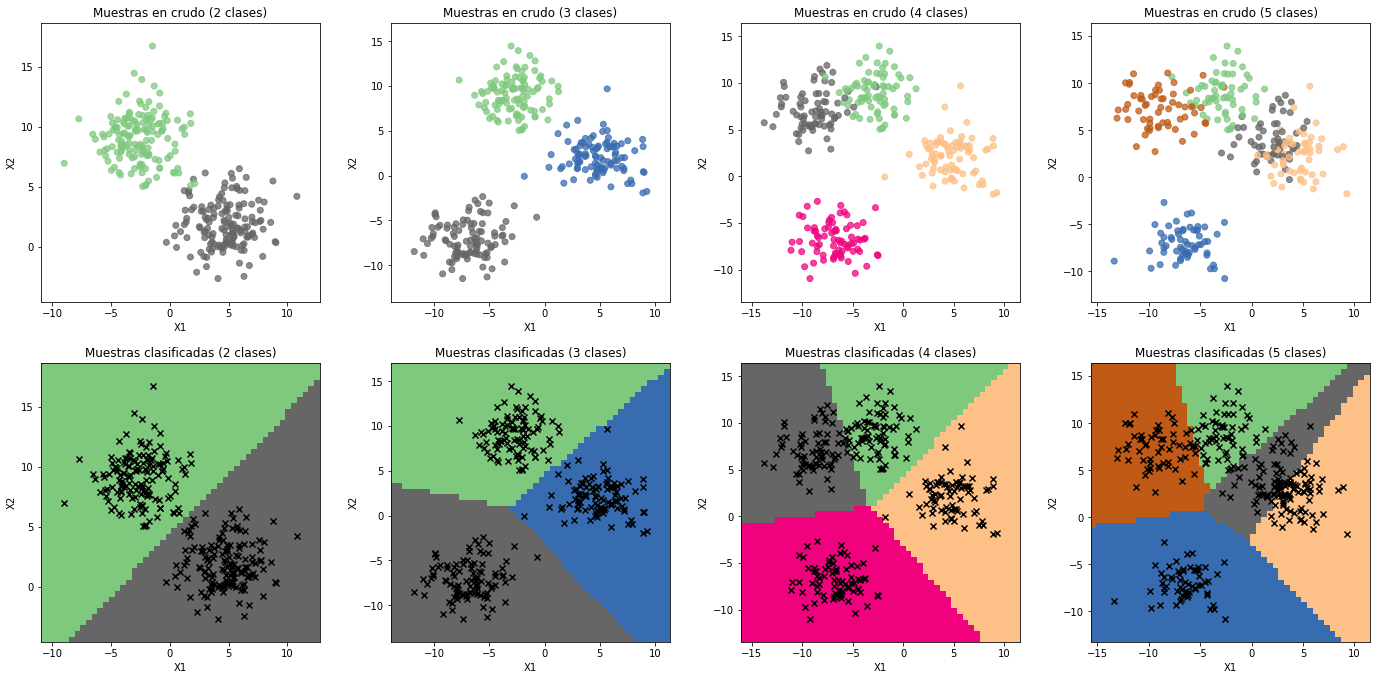

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import NearestCentroid
from sklearn.datasets import make_blobs, make_moons, make_circles

n_centers = [2, 3, 4, 5]

fig, axs = plt.subplots(nrows=2, ncols=len(n_centers), figsize=(5*len(n_centers), 10))
fig.tight_layout(pad=4.0)

for i in range(len(n_centers)):

  X, y = make_blobs(n_samples=300, n_features=2, centers=n_centers[i], cluster_std=2.0, random_state=42)

  min = np.amin(X, axis=0)
  max = np.amax(X, axis=0)

  diff = max - min

  min = min - 0.1 * diff
  max = max + 0.1 * diff

  axs[0,i].set_title('Muestras en crudo (' + str(n_centers[i]) + ' clases)')
  axs[0,i].set_xlabel('X1')
  axs[0,i].set_ylabel('X2')

  axs[0,i].set_xlim(min[0], max[0])
  axs[0,i].set_ylim(min[1], max[1])

  axs[0,i].scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Accent, alpha=0.75)

  nc = NearestCentroid().fit(X, y)

  xx, yy = np.meshgrid(np.linspace(min[0], max[0]), np.linspace(min[1], max[1]))
  Z = nc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape) 

  axs[1,i].set_title('Muestras clasificadas (' + str(n_centers[i]) + ' clases)')
  axs[1,i].set_xlabel('X1')
  axs[1,i].set_ylabel('X2')

  axs[1,i].set_xlim(min[0], max[0])
  axs[1,i].set_ylim(min[1], max[1])

  axs[1,i].pcolormesh(xx, yy, Z, cmap=plt.cm.Accent)
  axs[1,i].scatter(X[:,0], X[:,1], c='k', marker='x')

Aunque en el caso del conjunto de datos `blobs` su desempeño es aceptable, cuando tratamos de clasificar muestras no separables linealmente, el algoritmo ofrece unos resultados muy probres.

Con `moons`:

<ipython-input-3-a8b337d14eb4>:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1].pcolormesh(xx, yy, Z, cmap=plt.cm.bwr)


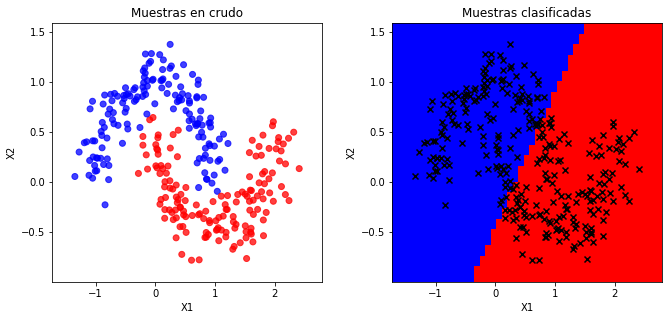

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestCentroid
from sklearn.datasets import make_moons

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.tight_layout(pad=4.0)

X, y = make_moons(n_samples=300, noise=0.15, random_state=42)

min = np.amin(X, axis=0)
max = np.amax(X, axis=0)

diff = max - min

min = min - 0.1 * diff
max = max + 0.1 * diff

axs[0].set_title('Muestras en crudo')
axs[0].set_xlabel('X1')
axs[0].set_ylabel('X2')

axs[0].set_xlim(min[0], max[0])
axs[0].set_ylim(min[1], max[1])

axs[0].scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr, alpha=0.75)

nc = NearestCentroid().fit(X, y)

xx, yy = np.meshgrid(np.linspace(min[0], max[0]), np.linspace(min[1], max[1]))
Z = nc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape) 

axs[1].set_title('Muestras clasificadas')
axs[1].set_xlabel('X1')
axs[1].set_ylabel('X2')

axs[1].set_xlim(min[0], max[0])
axs[1].set_ylim(min[1], max[1])

axs[1].pcolormesh(xx, yy, Z, cmap=plt.cm.bwr)
axs[1].scatter(X[:,0], X[:,1], c='k', marker='x')


Con `circles`:

<ipython-input-4-b02ae4c220e3>:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1].pcolormesh(xx, yy, Z, cmap=plt.cm.bwr)


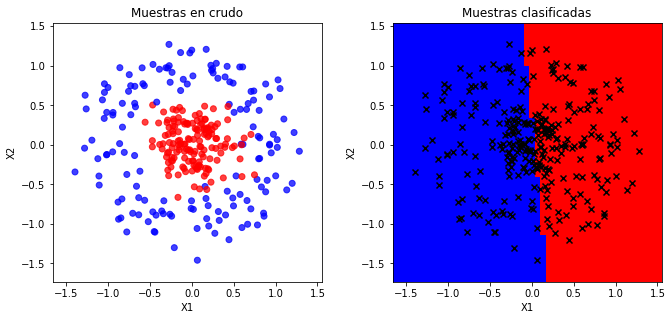

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestCentroid
from sklearn.datasets import make_circles

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.tight_layout(pad=4.0)

X, y = make_circles(n_samples=300, noise=0.20, factor=0.2, random_state=42)

min = np.amin(X, axis=0)
max = np.amax(X, axis=0)

diff = max - min

min = min - 0.1 * diff
max = max + 0.1 * diff

axs[0].set_title('Muestras en crudo')
axs[0].set_xlabel('X1')
axs[0].set_ylabel('X2')

axs[0].set_xlim(min[0], max[0])
axs[0].set_ylim(min[1], max[1])

axs[0].scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr, alpha=0.75)

nc = NearestCentroid().fit(X, y)

xx, yy = np.meshgrid(np.linspace(min[0], max[0]), np.linspace(min[1], max[1]))
Z = nc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape) 

axs[1].set_title('Muestras clasificadas')
axs[1].set_xlabel('X1')
axs[1].set_ylabel('X2')

axs[1].set_xlim(min[0], max[0])
axs[1].set_ylim(min[1], max[1])

axs[1].pcolormesh(xx, yy, Z, cmap=plt.cm.bwr)
axs[1].scatter(X[:,0], X[:,1], c='k', marker='x')

Con `spirals`:

<ipython-input-7-9892f7966b3f>:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1].pcolormesh(xx, yy, Z, cmap=plt.cm.bwr)


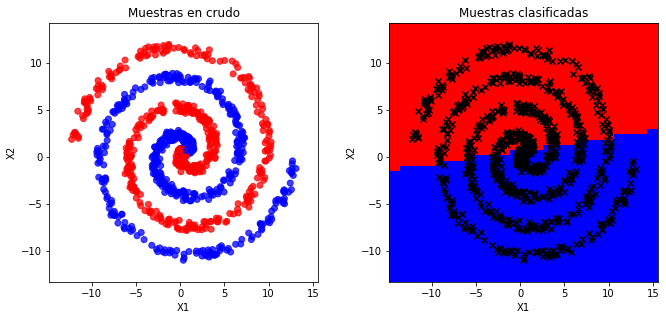

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestCentroid
from make_spirals import make_spirals

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.tight_layout(pad=4.0)

X, y = make_spirals(n_samples=1000, random_state=42)

min = np.amin(X, axis=0)
max = np.amax(X, axis=0)

diff = max - min

min = min - 0.1 * diff
max = max + 0.1 * diff

axs[0].set_title('Muestras en crudo')
axs[0].set_xlabel('X1')
axs[0].set_ylabel('X2')

axs[0].set_xlim(min[0], max[0])
axs[0].set_ylim(min[1], max[1])

axs[0].scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr, alpha=0.75)

nc = NearestCentroid().fit(X, y)

xx, yy = np.meshgrid(np.linspace(min[0], max[0]), np.linspace(min[1], max[1]))
Z = nc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape) 

axs[1].set_title('Muestras clasificadas')
axs[1].set_xlabel('X1')
axs[1].set_ylabel('X2')

axs[1].set_xlim(min[0], max[0])
axs[1].set_ylim(min[1], max[1])

axs[1].pcolormesh(xx, yy, Z, cmap=plt.cm.bwr)
axs[1].scatter(X[:,0], X[:,1], c='k', marker='x')

El algoritmo permite parametrizar la métrica de distancia utilizada mediante `metric` y un umbral `shrink_threshold` que modifica el cáculo del centroide dividiendo su valor para cada característica por la varianza de dicha carácteristica en cada clase. Esto permite ser menos sensible a conjuntos de datos con varianzas dispares.

<ipython-input-6-a2edf61963ab>:48: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1].pcolormesh(xx, yy, Z, cmap=plt.cm.Accent)
<ipython-input-6-a2edf61963ab>:67: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[2].pcolormesh(xx, yy, Z, cmap=plt.cm.Accent)
<ipython-input-6-a2edf61963ab>:86: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with

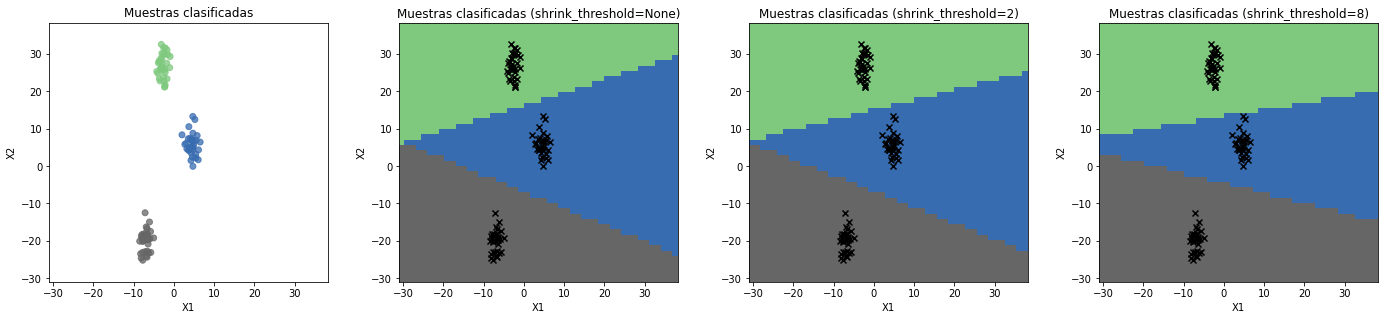

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.tight_layout(pad=4.0)

# dataset

X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, random_state=42)
X = X * [1, 3]

min = np.min(X)
max = np.max(X)

diff = max - min

min = min - 0.1 * diff
max = max + 0.1 * diff

xx, yy = np.meshgrid(np.linspace(min, max), np.linspace(min, max))


# plot dataset

axs[0].set_title('Muestras clasificadas')
axs[0].set_xlabel('X1')
axs[0].set_ylabel('X2')

axs[0].set_xlim(min, max)
axs[0].set_ylim(min, max)

axs[0].scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Accent, alpha=0.75)


# shrink_threshold=None

nc = NearestCentroid(shrink_threshold=None).fit(X, y)

Z = nc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape) 

axs[1].set_title('Muestras clasificadas (shrink_threshold=None)')
axs[1].set_xlabel('X1')
axs[1].set_ylabel('X2')

axs[1].set_xlim(min, max)
axs[1].set_ylim(min, max)

axs[1].pcolormesh(xx, yy, Z, cmap=plt.cm.Accent)
axs[1].scatter(X[:,0], X[:,1], c='k', marker='x')


# shrink_threshold=2

nc = NearestCentroid(shrink_threshold=2).fit(X, y)

xx, yy = np.meshgrid(np.linspace(min, max), np.linspace(min, max))
Z = nc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape) 

axs[2].set_title('Muestras clasificadas (shrink_threshold=2)')
axs[2].set_xlabel('X1')
axs[2].set_ylabel('X2')

axs[2].set_xlim(min, max)
axs[2].set_ylim(min, max)

axs[2].pcolormesh(xx, yy, Z, cmap=plt.cm.Accent)
axs[2].scatter(X[:,0], X[:,1], c='k', marker='x')


# shrink_threshold=8

nc = NearestCentroid(shrink_threshold=8).fit(X, y)

xx, yy = np.meshgrid(np.linspace(min, max), np.linspace(min, max))
Z = nc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape) 

axs[3].set_title('Muestras clasificadas (shrink_threshold=8)')
axs[3].set_xlabel('X1')
axs[3].set_ylabel('X2')

axs[3].set_xlim(min, max)
axs[3].set_ylim(min, max)

axs[3].pcolormesh(xx, yy, Z, cmap=plt.cm.Accent)
axs[3].scatter(X[:,0], X[:,1], c='k', marker='x')

---

Creado por **Fernando Ortega** (fernando.ortega@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">